# ALGORITHMIC QUESTION

In [1]:
import networkx as nx
from matplotlib import pyplot as plt
import numpy as np

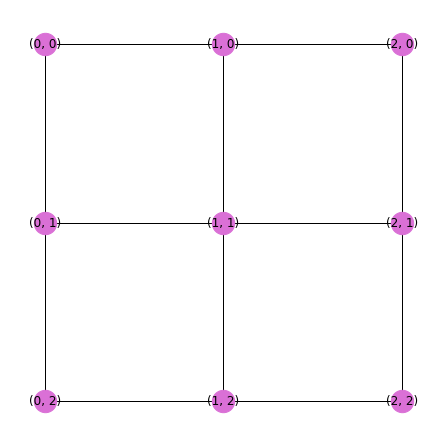

In [2]:
#First create a 3x3 graph and visualize it
G = nx.grid_2d_graph(3,3)

plt.figure(figsize=(6,6))
pos = {(x,y):(x,-y) for x,y in G.nodes()}
nx.draw(G, pos=pos, node_color = 'orchid', with_labels = True, node_size = 500)

In [3]:
#STEP-TO-STRING FUNCTION: From a single step, returns the direction of the step (e.g. 'R')
def step_to_string(couple):      #input: a couple of nodes (coordinates)
    diff = np.array(couple[1]) - np.array(couple[0])         #compute difference vector of the two nodes, which is unique for each direction

    #now check to which direction the difference corresponds to

    if (diff == [1,0]).all():
        step = 'R' 
    elif (diff == [-1,0]).all():
        step = 'L' 
    elif (diff == [0,1]).all():
        step = 'D' 
    elif (diff == [0,-1]).all():
        step = 'U' 

    return step


#PATH-TO-STRING FUNCTION. From a single path, generates a string of instructions (e.g. ['R', 'U', 'D', 'L', 'U') 
def path_to_string(path):     #input: a path (list of nodes)
    directions=['F']          #initialize list with a random character 

    for i in range(0, len(path)-1):    #iterate over each pair of nodes (step) in the given path
        direction = step_to_string((path[i], path[i+1]))   #retrieve direction of the step

        if direction != directions[-1]:                    #if the retrieved direction is different from the previous one, append it to the directions list. This is to avoid having repetitions in the directions list.
            directions.append(direction)

    directions.pop(0)       #now remove the initialization character 

    return directions


#GET-LIST-OF-STRINGS FUNCTION: From a graph and a pair of nodes, returns a list of strings corresponding to all possible paths. (e.g. [['R', 'U', 'L'], ['R', 'U', 'L'], ['R', 'D', 'R', 'U', 'L']])
def get_list_of_strings(G, i, j):  #input: a graph G and a pair of nodes: i, j

    strings = []
    for path in nx.all_simple_paths(G, i, j):    #find all simple paths from i to j 
        strings.append(path_to_string(path))    #convert them to strings and append to strings list

    return strings



In [24]:
#Now define the final function that returns the total number of paths

def get_number_of_paths(G, input_string): 

    allowed_instructions = ['D', 'R', 'L', 'U']    #the only possible instructions (directions)

    if ((len(input_string) <=10) & set(input_string).issubset(set(allowed_instructions))):   #checking the input string
        total = 0

        for i in G.nodes:   #iterate over all pairs of nodes in the graph
            for j in G.nodes:
                if j != i:
                    total += get_list_of_strings(G,i,j).count(input_string)    #and add the number of matching paths to the total
    
        print(total)

    #if input is incorrect, print warnings
    elif(len(input_string) > 10):     
        print("Maximimum Length of input string is 10")       

    if not(set(input_string).issubset(set(allowed_instructions))):
        print("Please insert only valid instructions such as D, U, R, L.")

    return 


In [27]:
input_string = list(input())      #take input from standard input

get_number_of_paths(G, input_string)  #apply function to input

15


Recreating the examples from the text of the exercise: 

In [28]:
#INPUT 1: DRU

input_string = list('DRU')
get_number_of_paths(G, input_string)

15


In [29]:
#INPUT 1: R

input_string = list('R')
get_number_of_paths(G, input_string)

9


In [30]:
#INPUT 3: LDRDRUL

input_string = list('LDRDRUL')
get_number_of_paths(G, input_string)

0
